In [1]:
import os
from argparse import Namespace
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import matplotlib.pyplot as plt

In [2]:
args = Namespace(
    traning_corpus_filepath = './data/clean_data/word2vec_training_corpus.txt',
    
    model_dir = './models',    
    model_path = './models/word2vec_model.p',
    model_path_c = './models/word2vec_model.bin'
    
)

os.makedirs(args.model_dir, exist_ok = True)

In [3]:
class ReadSentence:
    
    def __init__(self, filepath):
        self.filepath = filepath
                
    def __iter__(self):
        with open(args.traning_corpus_filepath) as f:
            for line in f.readlines():
                yield eval(line)

In [4]:
class EpochSaver(CallbackAny2Vec):
    
    def __init__(self):
        self.batch_loss = []
        self.prev_loss = 0
        
    def on_batch_end(self,model):
        curr_loss = model.get_latest_training_loss()
        loss = curr_loss - self.prev_loss
        self.prev_loss = curr_loss
        self.batch_loss.append(loss)
        
    def on_epoch_end(self, model):
        pass

In [5]:
## sentence iterator
sentence_reader = ReadSentence(args.traning_corpus_filepath)
epochSaver = EpochSaver()

In [6]:
params = {
            "sentences" : sentence_reader,
            "size" : 100,           # dim of embedding
            "window" : 40,
            "min_count" : 40,
            "workers" : 3,
            "sg" : 1,               # sg=1 : skipgram , sg=0 : cbow
            "hs" : 1 ,
            "negative" : 5,
            "iter" : 5,
            "batch_words" : 10000,
            "compute_loss" : True,
            "callbacks" : [epochSaver]
}

In [7]:
model = Word2Vec(**params)

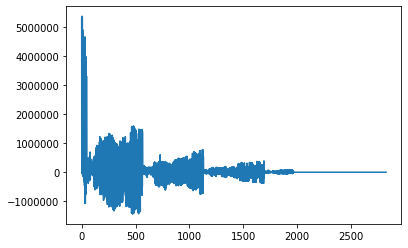

In [8]:
plt.plot(epochSaver.batch_loss)

In [9]:
## Save model (for further training)
model.save(args.model_path)

In [10]:
## Save model in original format
model.wv.save_word2vec_format(args.model_path_c, binary = True)

## Evaluate

In [13]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format(args.model_path_c, binary = True)

In [14]:
model.most_similar('awful')

[('terrible', 0.8134520053863525),
 ('worse', 0.7999075651168823),
 ('worst', 0.7900944948196411),
 ('dreadful', 0.7886014580726624),
 ('lousy', 0.7806686162948608),
 ('mess', 0.7771373391151428),
 ('atrocious', 0.7725487351417542),
 ('embarrassing', 0.7631992101669312),
 ('plain', 0.7577114105224609),
 ('bad', 0.7571655511856079)]

In [15]:
model.most_similar('bad')

[('worse', 0.8648759722709656),
 ('terrible', 0.8513275384902954),
 ('crappy', 0.8441234827041626),
 ('plain', 0.8324521780014038),
 ('acting', 0.8320739269256592),
 ('excuse', 0.8279955387115479),
 ('horrible', 0.8279228210449219),
 ('actually', 0.8209360837936401),
 ('worst', 0.8178929090499878),
 ('seriously', 0.8141182661056519)]

In [16]:
model.most_similar('good')

[('really', 0.9003206491470337),
 ('well', 0.8936648368835449),
 ('pretty', 0.8865994215011597),
 ('nice', 0.8715674877166748),
 ('done', 0.8680661916732788),
 ('lot', 0.8658228516578674),
 ('much', 0.8608795404434204),
 ('though', 0.8577100038528442),
 ('like', 0.8530203104019165),
 ('movie', 0.8501754999160767)]